In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("Mall_Customers.csv")
print("First 5 rows of the data:")
print(data.head())
print("\nData shape:", data.shape)

First 5 rows of the data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data shape: (200, 5)


In [4]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


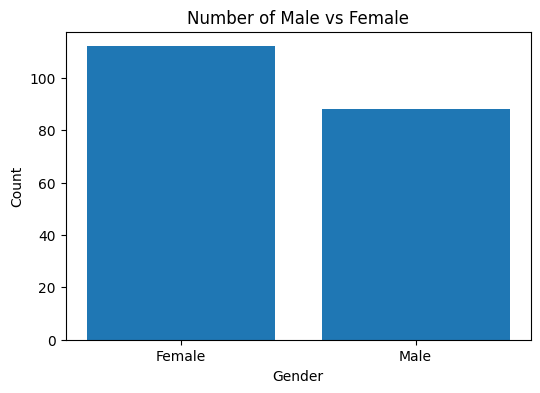

In [5]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

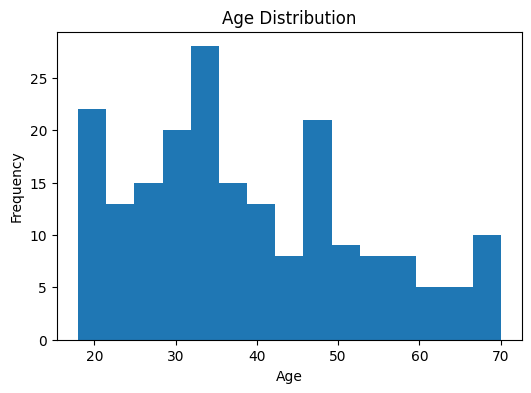

In [6]:
plt.figure(figsize=(6,4))
plt.hist(data['Age'], bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

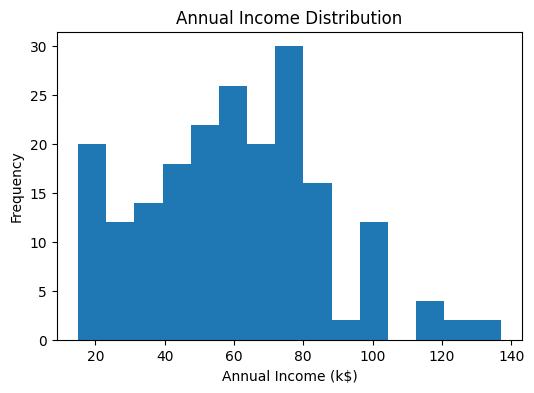

In [7]:
plt.figure(figsize=(6,4))
plt.hist(data['Annual Income (k$)'], bins=15)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

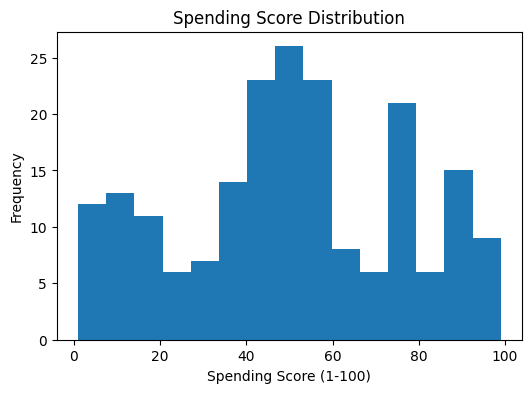

In [8]:
plt.figure(figsize=(6,4))
plt.hist(data['Spending Score (1-100)'], bins=15)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

In [9]:
encoder = LabelEncoder()
data['GenderEncoded'] = encoder.fit_transform(data['Gender'])  # Female->0, Male->1
print("\nSample after encoding Gender:")
print(data[['Gender', 'GenderEncoded']].head())


Sample after encoding Gender:
   Gender  GenderEncoded
0    Male              1
1    Male              1
2  Female              0
3  Female              0
4  Female              0


In [10]:
X = data[['GenderEncoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
inertias = []
K_values = list(range(1, 11))
for k in K_values:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

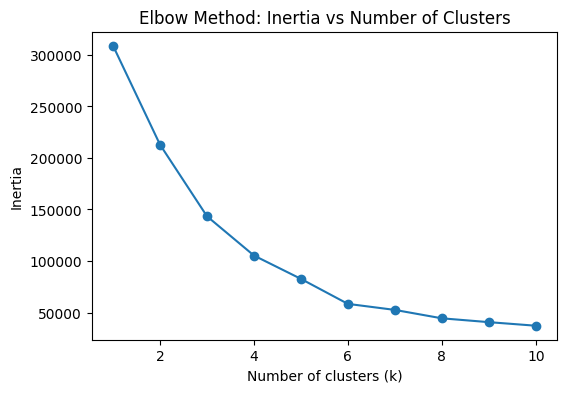

In [12]:
plt.figure(figsize=(6,4))
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [13]:
print("Look at the plot above and choose a k where the curve bends (elbow).")

Look at the plot above and choose a k where the curve bends (elbow).


In [14]:
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [15]:
data['Cluster'] = kmeans.labels_
print("\nData with cluster labels:")
print(data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


Data with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        0  
3        2  
4        0  


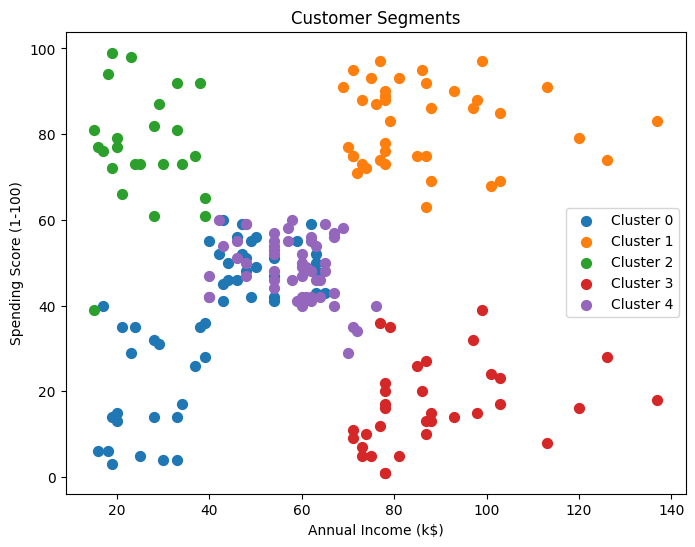

In [16]:
plt.figure(figsize=(8,6))
for c in range(chosen_k):
    subset = data[data['Cluster'] == c]
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'],
                label=f'Cluster {c}', s=50)

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [17]:
cluster_profile = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_counts = data['Cluster'].value_counts().sort_index()
profile = pd.concat([cluster_counts.rename('Count'), cluster_profile], axis=1)

print("\nCluster Profiles:")
print(profile)


Cluster Profiles:
         Count        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0           50  54.060000           40.460000               36.720000
1           39  32.692308           86.538462               82.128205
2           24  25.250000           25.833333               76.916667
3           34  41.647059           88.735294               16.764706
4           53  33.396226           58.056604               48.773585


In [18]:
print("\nInterpretation ideas:")
print("- Look at which clusters have high income but low spending score.")
print("- Look at which clusters have low income but high spending score.")
print("- Describe age characteristics of each cluster.")


Interpretation ideas:
- Look at which clusters have high income but low spending score.
- Look at which clusters have low income but high spending score.
- Describe age characteristics of each cluster.
